In [1]:
import mido
import matplotlib.pyplot as plt
import numpy as np

import smart_loop_test

%matplotlib inline

use https://mido.readthedocs.io/en/latest/ for midi management

In [2]:
mf = mido.MidiFile('cycle-test.mid')
#mf.ticks_per_beat = 960

First, plot the deltas to get a sense of what the legitimate spacing is so we can get an idea of how wide our window should be.

- [ ] 

In [3]:
track = mf.tracks[0]

In [4]:
current_time = 0
note_ons = []
for i in range(len(track)):
    current_time = current_time + track[i].time
    #print("{}, time: {}".format(track[i], current_time))
    if(track[i].type == "note_on"):
        note_ons.append(current_time)

Why do the time values of the messages not seem to be affected by ticks_per_beat?

Should do according to https://mido.readthedocs.io/en/latest/midi_files.html#tempo-and-beat-resolution

In [5]:
dt = np.diff(note_ons)

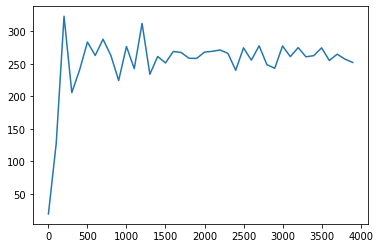

In [6]:
shifts = list(range(0,4000,100))
p = [smart_loop_test.self_product_shift(note_ons, s, 50) for s in shifts]
plt.plot(shifts, p)

Why is the 0 shift value so small? Why does it jump up immediately? That seems like a glitch

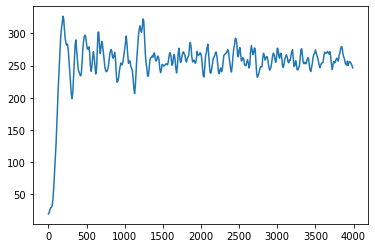

In [7]:
shifts = list(range(0,4000,10))
p = [smart_loop_test.self_product_shift(note_ons, s, 50) for s in shifts]
plt.plot(shifts, p)

Alright, so it's not a problem exactly at zero, but at small values.

Let's plot the first bit of the sequence plus the shift for a small shift

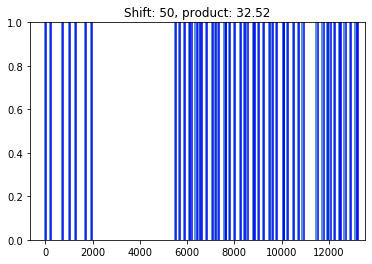

In [8]:
plt.figure()

shift = 50


plt.title("Shift: {}, product: {}".format(shift, smart_loop_test.self_product_shift(note_ons, shift, 50)))
[plt.axvline(x=xv) for xv in note_ons[:50]]
a = [plt.axvline(x=xv, color='b') for xv in np.array(note_ons[:50]) + shift]


now for a larger shift

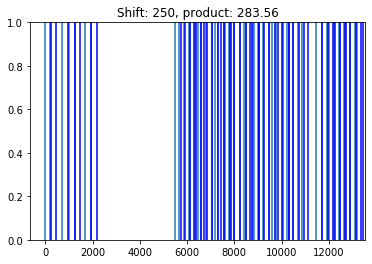

In [9]:
plt.figure()

shift = 250


plt.title("Shift: {}, product: {}".format(shift, smart_loop_test.self_product_shift(note_ons, shift, 50)))
[plt.axvline(x=xv) for xv in note_ons[:50]]
a = [plt.axvline(x=xv, color='b') for xv in np.array(note_ons[:50]) + shift]

Ok, so the reason it's so small is because the notes just aren't hit that fast and so no notes are in the windows of other notes.

So the problem now is why we don't see any periodicity spikes. Probably the issue is just that we don't have good data

Actually, first I want to see what happens if we take into account the notes themselves. Right now we're only concerned with the timing of the notes